In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format','{:.2f}'.format)

In [2]:
# Example: Create a sales dataset
dates = pd.date_range(start="2025-01-01", end="2025-12-31", freq='D')
hours = range(10,23)

sales_records = []
menu_items = ['Hummus','Shawarma','Falafel','Kofta','Tabbouleh','Baklava','Mint Tea']

for d in dates:
    for h in hours:
        num_tx = np.random.poisson(lam=10)
        for i in range(num_tx):
            item = np.random.choice(menu_items)
            price = round(np.random.uniform(6,18),2)
            cost = round(price * np.random.uniform(0.30, 0.50),2)
            sales_records.append({
                'date': d,
                'hour': h,
                'item': item,
                'price': price,
                'cost': cost
            })

sales_df = pd.DataFrame(sales_records)
sales_df.head()

,date,hour,item,price,cost
0,2025-01-01,10,Hummus,11.82,5.02
1,2025-01-01,10,Tabbouleh,15.68,6.93
2,2025-01-01,10,Falafel,6.82,2.96
3,2025-01-01,10,Hummus,8.86,3.34
4,2025-01-01,10,Shawarma,17.84,6.06


In [3]:
# Daily revenue summary
daily_summary = sales_df.groupby('date').agg(
    total_revenue=pd.NamedAgg(column='price', aggfunc='sum'),
    total_cost=pd.NamedAgg(column='cost', aggfunc='sum'),
    transactions=pd.NamedAgg(column='price', aggfunc='count')
).reset_index()

daily_summary['avg_check'] = daily_summary['total_revenue'] / daily_summary['transactions']
daily_summary['food_cost_pct'] = (daily_summary['total_cost'] / daily_summary['total_revenue'])*100

daily_summary.head()

,date,total_revenue,total_cost,transactions,avg_check,food_cost_pct
0,2025-01-01,1671.47,672.66,139,12.02,40.24
1,2025-01-02,1446.68,570.16,118,12.26,39.41
2,2025-01-03,1682.94,663.10,140,12.02,39.40
3,2025-01-04,1917.45,762.98,157,12.21,39.79
4,2025-01-05,1424.91,573.73,119,11.97,40.26


In [4]:
menu_perf = sales_df.groupby('item').agg(
    qty_sold=('price','count'),
    revenue=('price','sum'),
    cost=('cost','sum')
).reset_index()

menu_perf['profit'] = menu_perf['revenue'] - menu_perf['cost']
menu_perf['profit_margin_pct'] = (menu_perf['profit']/menu_perf['revenue'])*100

menu_perf.sort_values(by='qty_sold', ascending=False)

,item,qty_sold,revenue,cost,profit,profit_margin_pct
6,Tabbouleh,6891,82864.32,33144.50,49719.82,60.00
4,Mint Tea,6885,82453.58,33032.14,49421.44,59.94
3,Kofta,6846,82199.42,32893.19,49306.23,59.98
2,Hummus,6792,81443.14,32590.24,48852.90,59.98
1,Falafel,6782,81184.22,32377.72,48806.50,60.12
5,Shawarma,6761,81007.92,32334.09,48673.83,60.09
0,Baklava,6725,80704.03,32207.93,48496.10,60.09


In [5]:
available_seats = 40

hourly = sales_df.groupby(['date','hour']).agg(
    revenue=('price','sum'),
    transactions=('price','count')
).reset_index()

hourly['RevPASH'] = hourly['revenue']/available_seats
hourly.head()

,date,hour,revenue,transactions,RevPASH
0,2025-01-01,10,171.71,13,4.29
1,2025-01-01,11,113.51,11,2.84
2,2025-01-01,12,128.17,10,3.20
3,2025-01-01,13,136.03,11,3.40
4,2025-01-01,14,101.19,9,2.53


In [6]:
staff = ['Ali','Sara','Hassan','Mona']
labour = []

for d in dates:
    for s in staff:
        hours = np.random.choice([4,6,8])
        wage = np.random.uniform(10,14)
        labour.append({
            'date': d,
            'staff': s,
            'hours_worked': hours,
            'wage_cost': round(hours*wage,2)
        })

labour_df = pd.DataFrame(labour)
labour_summary = labour_df.groupby('staff').agg(
    total_hours=('hours_worked','sum'),
    total_wage=('wage_cost','sum')
)
labour_summary

,total_hours,total_wage
staff,,
Ali,2190,26405.21
Hassan,2180,26310.61
Mona,2214,26630.02
Sara,2174,26166.32


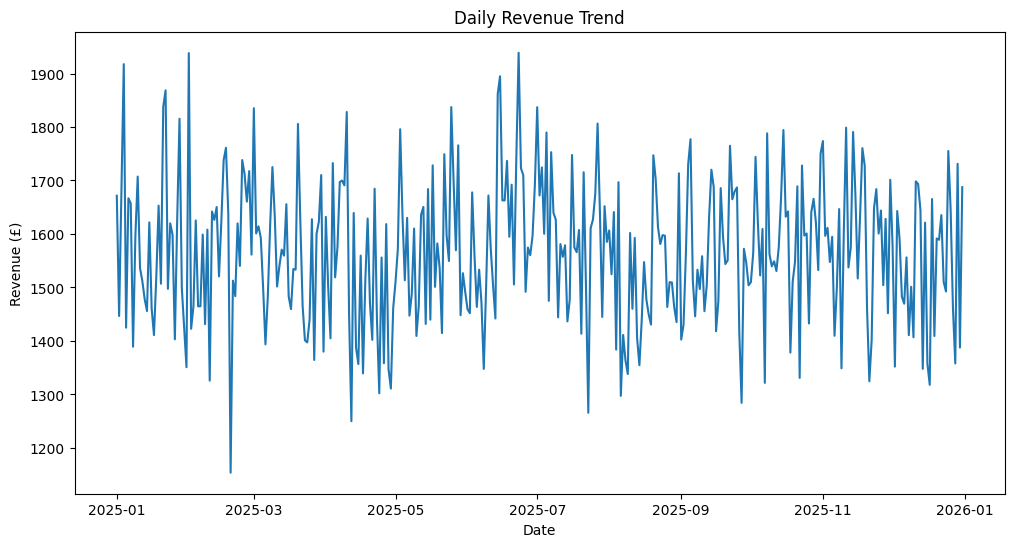

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='total_revenue', data=daily_summary)
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue (£)')
plt.show()